# Mod6L5 Data Challenge — Interpreting SLR Output (Dec 2023 NYC Taxi)


**Format:** We Do (Instructor prompts) → You Do (Student work) → We Share (reflection)


**Goal:** Choose **one** dependent variable (**Y**) from the taxi dataset and build **three** simple linear regressions (each with a different single **X**) on **Dec 2023** rides. For each model, interpret the **coefficient**, **intercept**, **p‑value**, and **R‑squared** in plain business language. Then decide which model is “better” *for decision‑making* and why.


> **Reminder:** No train/test split or advanced metrics today. We focus on reading `.summary()` and communicating results.

## Instructor Section (10 mins)

**Follow these steps/considerations as you work**


1) **Pick a useful Y.** Which outcome would someone actually act on?  Who is the stakeholder for your Y?

*Avoid constructing Y that bakes in your X (e.g., avoid using `fare_amount` as X when Y = `total_amount` which already includes fare).*


2) **Choose three X’s** you can know at decision time, and that plausibly relate to Y. 

*You may engineer a feature to use in the model if you like*

*Note:  SLR needs numeric only inputs so variables like `PULocationID` can't be used (categorical → not for SLR today unless you transform; stick to numeric X for this exercise)*


3) **Interpretation lenses:**
- **Units:** Always state slope in units (e.g., “per mile”, “per minute”).
- **p‑value:** Does evidence suggest the slope ≠ 0?
- **R²:** How much of Y’s variation is captured by this X? Does that help the decision?
- **Intercept:** Is X=0 meaningful? If not, say it’s a math anchor.
- **Plausibility:** Does the direction/size make sense (e.g., longer trip → higher fare)?


4) **Better ≠ only higher R².** Weigh **interpretability**, **actionability**, and **evidence** (p‑value, CI) alongside R².

## YOU DO (40 mins)

### Step 1: Read in the Data & Choose your **Y** (dependent variable)

Pick one from the 2023_Yellow_Taxi_Trip_Data_20251015 csv file  

In [6]:
import pandas as pd

df = pd.read_csv('/Users/Marcy_Student/DA2025_Lectures/Mod6/data/2023_Yellow_Taxi_Trip_Data_20251015.csv')

/var/folders/_z/410cfm6x4fl_4m_6s41fnf4w0000gp/T/ipykernel_84832/588297437.py:3: DtypeWarning: Columns (4,10,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Marcy_Student/DA2025_Lectures/Mod6/data/2023_Yellow_Taxi_Trip_Data_20251015.csv')


### Step 2: Propose three candidate **X** predictors (numeric)

Pick three different X columns that are **numeric** and **known at decision time**.

trip_distance

passenger_count

fare_amount

### Step 3: Fit three one‑variable models with the SAME Y and different Xs

In [7]:
import statsmodels.api as sm


num_cols = ['trip_distance', 'passenger_count', 'fare_amount', 'total_amount']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna(subset=num_cols)

#trip_distance
X = sm.add_constant(df['trip_distance'])
y = df['total_amount']
modelA = sm.OLS(y, X).fit()
modelA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 6.505e+06
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:13:23   Log-Likelihood:            -1.2635e+07
No. Observations:             3133514   AIC:                         2.527e+07
Df Residuals:                 3133512   BIC:                         2.527e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.1518      0.010   1482.569      0.000      14.133      14.171
trip_distance     4.3554      0.002   2550.468      0.000       4.352       4.359
==============================================================================
Omnibus:                  7315858.153   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    5005176431291.856
Skew:                         -21.484   Prob(JB):                         0.00
Kurtosis:                    6194.402   Cond. No.                         7.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# fare_amount
X = sm.add_constant(df['fare_amount'])
y = df['total_amount']
modelA = sm.OLS(y, X).fit()
modelA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 7.460e+07
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:13:23   Log-Likelihood:            -9.3640e+06
No. Observations:             3133514   AIC:                         1.873e+07
Df Residuals:                 3133512   BIC:                         1.873e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5684      0.004   1177.473      0.000       4.561       4.576
fare_amount     1.2293      0.000   8636.841      0.000       1.229       1.230
==============================================================================
Omnibus:                  1742096.675   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        991378239.969
Skew:                           1.332   Prob(JB):                         0.00
Kurtosis:                      90.098   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# passenger_count
X = sm.add_constant(df['passenger_count'])
y = df['total_amount']
modelA = sm.OLS(y, X).fit()
modelA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8102.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:13:23   Log-Likelihood:            -1.4391e+07
No. Observations:             3133514   AIC:                         2.878e+07
Df Residuals:                 3133512   BIC:                         2.878e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.6388      0.025   1071.794      0.000      26.590      26.688
passenger_count     1.3327      0.015     90.011      0.000       1.304       1.362
==============================================================================
Omnibus:                  2051370.456   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        116986327.269
Skew:                           2.490   Prob(JB):                         0.00
Kurtosis:                      32.516   Cond. No.                         3.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 4: Visual check for the “best” model candidate

Pick the model you currently prefer (based on business sense + evidence).
- Create a scatter of X vs. Y with the fitted line.

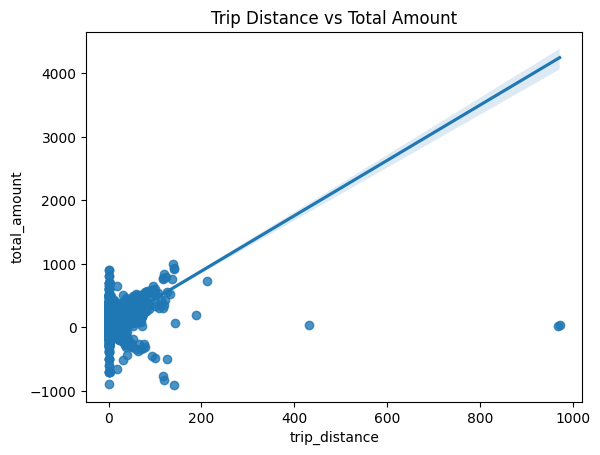

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='trip_distance', y='total_amount', data=df)
plt.title('Trip Distance vs Total Amount')
plt.show()


### Step 5: Interpret Each Model (write in plain English)
Fill the three blocks below. Use **units** and **percentage points (pp)** where relevant.

- **Slope (β₁):** “For each +1 unit of X, Y changes by …”
- **Intercept (β₀):** meaningful or just a math anchor? Explain.
- **p‑value:** is there evidence the slope ≠ 0?
- **R²:** how much variation does this X explain?
- **Judgment:** is the effect size **practically** meaningful (tie to business)?

### Model A — Y = {{YOUR_Y}} ~ X1 = {{YOUR_X1}}
- Slope (β₁): Each additional mile increases total fare by about $4.36 on average.
- Intercept (β₀): About $14.15, roughly the base charge for entering the cab.
- p‑value (slope): < 0.001 — strong evidence distance affects total.
- 95% CI for slope: We’re 95% confident that the true increase per mile lies between $4.35 and $4.36
- R²: 0.675, moderately relation to the linearity 
- Business readout (units): The slope coefficient 4.3554 means that for every extra mile, the fare increases by about $4.36


### Model B — Y = {{YOUR_Y}} ~ X2 = {{YOUR_X2}}
- Slope (β₁): Each $1 increase in fare_amount raises total_amount by about $1.23
- Intercept (β₀): 4.57, base charge before fare
- p‑value (slope): < 0.001 - statistically significant.
- 95% CI for slope: [$1.229, $1.230]
- R²: 0.960 - fare_amount explains 96% of total fare variation.
- Business readout (units): Each $1 increase in fare_amount raises total_amount by about $1.23. We’re 95% confident the true increase lies between $1.229 and $1.230.

### Model C — Y = {{YOUR_Y}} ~ X3 = {{YOUR_X3}}
- Slope (β₁): Each additional passenger adds about $1.33 to the total fare
- Intercept (β₀): $26.64 estimated fair with 0 passengers
- p‑value (slope): Statistically significant due to large sample size
- 95% CI for slope: [1.304, 1.362]
- R²: Passenger count explains only 0.3% of variation in total fare
- Business readout (units): Each additional passenger adds about $1.33 to the total fare


## We Share (10 mins) — Reflection & Decision (write 1-2 short paragraphs)

1) **Which model is “better” for a stakeholder decision and why?**
- Weigh **evidence** (p‑value, CI), **explanatory power** (R²), **interpretability**, and **business impact** (units, MDE if relevant).
2) **What would you do next week to strengthen trust in this model?**
- (Preview) time‑based validation, hold‑out testing, segment checks, adding more plausible X’s, checking assumptions.

Model A is the most useful for decision-making. trip_distance is actionable before the ride ends and explains a large share of variation in total fares. It also reflects a clear, interpretable unit change (“per mile”) that stakeholders can use for pricing or forecasting. Model C fits best statistically but is irrelevant since fare_amount is part of total_amount.